In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

In [138]:
data = pd.read_csv('train.csv')

In [139]:
data.shape

(10000, 20)

In [140]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


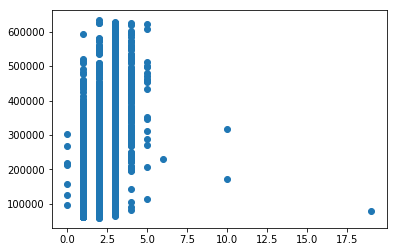

In [141]:
plt.scatter(data['Rooms'], data['Price'])
plt.show()

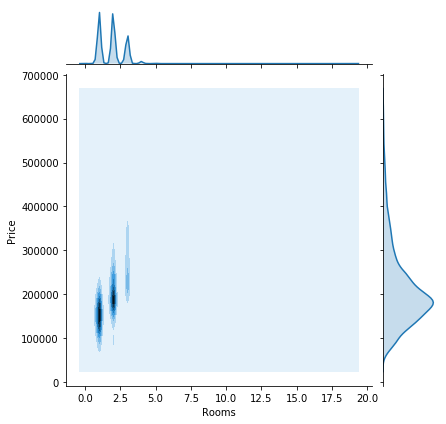

In [142]:
sns.jointplot(data['Rooms'], data['Price'], kind='kde')

(array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
         335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <a list of 20 Patch objects>)

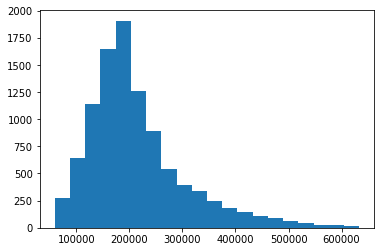

In [143]:
plt.hist(data['Price'], bins=20)

In [144]:
min_price = data['Price'].min()
max_price = data['Price'].max()
print(f'min_price: {min_price}, max_price: {max_price}')

min_price: 59174.77802758122, max_price: 633233.4665699474


In [145]:
ls = np.linspace(min_price, max_price, 21)

In [146]:
ls

array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
       173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
       288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
       403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
       518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
       633233.46656995])

In [147]:
qty_flat = []

for i in range(20):
    if i < 19:
        qty_flat.append(data.loc[(data['Price'] >= ls[i]) & (data['Price'] < ls[i+1]), :].shape[0])
    else: 
        qty_flat.append(data.loc[(data['Price'] >= ls[i]) & (data['Price'] <= ls[i+1]), :].shape[0])

In [148]:
qty_flat = np.array(qty_flat, dtype=np.float64)
qty_flat

array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
        335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
         23.,   18.])

(array([8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.705e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.880e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.235e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.500e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.800e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

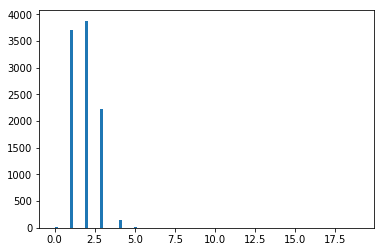

In [149]:
plt.hist(data['Rooms'], bins=100)

In [150]:
data['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [151]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [152]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [153]:
data['DistrictId'].nunique()

205

In [154]:
data['DistrictId'].dtype

dtype('int64')

In [155]:
data['DistrictId'].dtype

dtype('int64')

In [156]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [157]:
data = pd.get_dummies(data)
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.0,0,6,215898.447742,0,1,0,1,0,1
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,NaN,1,5,296021.204377,0,1,0,1,0,1
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,6,1437,3,NaN,0,2,221244.156664,0,1,0,1,0,1
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,264,0,NaN,0,1,229102.795999,0,1,0,1,0,1
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,NaN,0,2,95380.220993,0,1,0,1,0,1


In [158]:
# dummies := convert categories into quanttive values
pd.get_dummies(data).shape

(10000, 23)

In [159]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [160]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [161]:
data.groupby('DistrictId')[['Price']].mean()

,Price
DistrictId,
0,195295.590075
1,187805.401737
2,243688.618402
3,179905.016194
4,300096.687440
5,238650.600802
6,166127.145161
7,243154.833226
8,214455.071993


In [162]:
data.groupby(['DistrictId', 'Rooms'])[['Price']].mean()

Price
DistrictId Rooms               
0          1.0    141262.601991
           2.0    197998.146681
           3.0    304170.518823
1          1.0    147454.605358
           2.0    198777.278269
           3.0    246262.924161
           4.0    277290.705058
           19.0    78364.616704
2          1.0    177871.758149
           2.0    243022.112038
           3.0    342699.342039
           4.0    294405.899542
3          1.0    153218.655413
           2.0    187456.411486
           3.0    226063.548060
...                         ...
195        3.0    486057.129888
           5.0    479525.147323
196        2.0    336584.118092
199        3.0    432546.129741
200        1.0    245039.663085
           2.0    244300.906533
           3.0    500029.844280
201        1.0    341805.242387
           2.0    261645.935295
202        2.0    502085.860162
           3.0    286215.863552
205        1.0    220501.566180
207        3.0    426186.409334
208        2.0    431137.654083
209        1.0    140048.802277

[675 rows x 1 columns]

In [163]:
data.groupby(['DistrictId', 'Rooms'])[['Price']].mean().reset_index()

,DistrictId,Rooms,Price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147454.605358
4,1,2.0,198777.278269
5,1,3.0,246262.924161
6,1,4.0,277290.705058
7,1,19.0,78364.616704
8,2,1.0,177871.758149
9,2,2.0,243022.112038


In [164]:
# equal to the above
data.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean()

,DistrictId,Rooms,Price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147454.605358
4,1,2.0,198777.278269
5,1,3.0,246262.924161
6,1,4.0,277290.705058
7,1,19.0,78364.616704
8,2,1.0,177871.758149
9,2,2.0,243022.112038


In [165]:
data_stat1 = data.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price': 'mean_price'})

In [166]:
data_stat1.shape

(675, 3)

In [167]:
data = pd.merge(data, data_stat1, on=['DistrictId', 'Rooms'], how='left')
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1,155748.415754
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.0,0,6,215898.447742,0,1,0,1,0,1,400943.021226
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,NaN,1,5,296021.204377,0,1,0,1,0,1,253795.661825
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,6,1437,3,NaN,0,2,221244.156664,0,1,0,1,0,1,236250.931918
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,264,0,NaN,0,1,229102.795999,0,1,0,1,0,1,198777.278269
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,NaN,0,2,95380.220993,0,1,0,1,0,1,100961.810824


In [168]:
pd.options.display.max_columns = 40

In [169]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1,155748.415754


In [170]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139,74586.010424
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78364.616704
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,166014.055413
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,198777.278269
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,248821.481005
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,624156.003381


In [171]:
# mean_price my be used as feature or replacement for empty / fault price

In [172]:
# checking correlation coefficient
data.loc[:, ['Price', 'mean_price']].corr()

,Price,mean_price
Price,1.000000,0.803103
mean_price,0.803103,1.000000


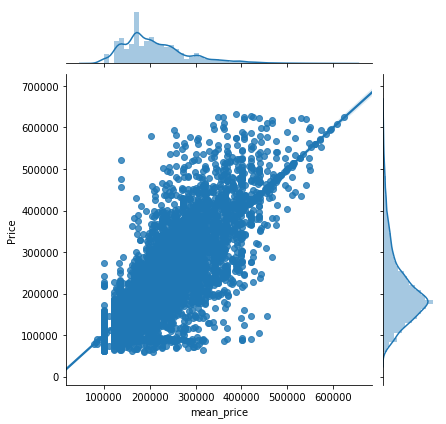

In [177]:
sns.jointplot(data['mean_price'], data['Price'], kind='reg');

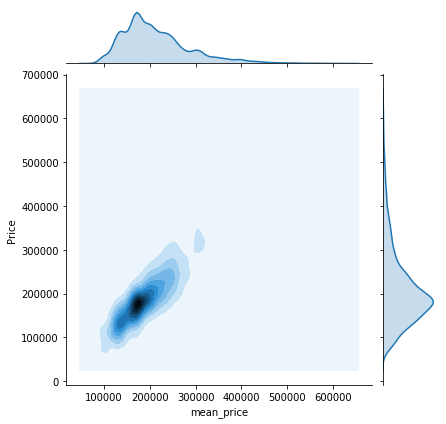

In [178]:
sns.jointplot(data['mean_price'], data['Price'], kind='kde');